# Titanic 실습

@ sheon-j

---

**Contents**
1. Overview
2. Dataset
3. EDA
4. Working with Feature Data
5. Feature Engineering
6. Scling and Train Split
7. Creating a Model
8. Training a Model
9. Evaluation on Test Data
10. Predicting on a virtual data

## 1. Overview
---
판다스 스터디의 두 번째 주제입니다. Titanic Dataset을 통해 가벼운 EDA와 ML을 실습합니다.

타이타닉은 영국의 북대서양 횡단 여객선입니다. 1912년 4월 10일 영국의 사우샘프턴에서 미국의 뉴욕으로 향하던 첫 항해 중, 4월 14일 **23시 40분** 빙산과 충돌하여 주갑판이 함몰되고 우현에 구멍이 났습니다. 타이타닉이 완전히 침몰한 시간은 **2시 20분**입니다. 

출항 당시 승선 인원은 **2,223명**이였으며, 타이타닉의 침몰로 **1,514명**이 사망, **709명**이 생존하였습니다.
타이타닉의 호화로운 시설과 다르게 구명정은 20척 밖에 없었습니다. 구명정 20척의 최대 정원은 1,178명이었습니다. 침몰 당시에도 배에 1,000여명의 사람들이 남아 있었으며 바다로 뛰어든 많은 사람들은 저체온증으로 사망하였습니다. 구명정을 타고 있다 구조된 사람은 706명입니다.

![titanic](https://upload.wikimedia.org/wikipedia/commons/thumb/f/fd/RMS_Titanic_3.jpg/440px-RMS_Titanic_3.jpg)

## 2. Dataset
---
**Feature Column**
* **Age**: 나이 
* **Cabin**: 객실 번호
* **Embarked**: 탑승 항구 (C: Cherbourg, Q: Queenstown, S: Southampton)
* **Fare**: 티켓 요금
* **Name**: 이름
* **Parch**: 동승한한 부모 및 자식의 수
* **PassengerID**: 탑승객 ID
* **Pclass**: 티켓 클래스 (1: 1등석. 2: 2등석, 3: 3등석)
* **Sex**: 성별
* **SibSp**: 동승한 형제자매 및 배우자의 수
* **Survived**: 생존 여부 (0:사망, 1:생존)
* **Ticket** 티켓 번호

### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [81]:
url = 'https://raw.githubusercontent.com/sheon-j/pandas-study/main/datasets/titanic/titanic3.csv'

# boat, body, home.dest는 타겟 이벤트 이후의 특성입니다.  
df = pd.read_csv(url).iloc[:, :-3]
df.head(3)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S


### Analyze by Describing Data

In [77]:
df.tail(3)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.225,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,7.225,NaN,C,NaN,NaN,NaN
1308,3,0,"Zimmerman, Mr. Leo",male,29.0,0,0,315082,7.875,NaN,S,NaN,NaN,NaN


---
feature 유형

* **범주형**: Name, Sex, Cabin, Embarked

* **순서형**: Survived, Pclass, PassengerId, Ticket

* **연속형**: Age, SibSp, Parch, Fare

In [82]:
# 컬럼명 확인
print(df.columns.values)

['pclass' 'survived' 'name' 'sex' 'age' 'sibsp' 'parch' 'ticket' 'fare'
 'cabin' 'embarked']


In [83]:
# 컬럼럼 정보보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   name      1309 non-null   object 
 3   sex       1309 non-null   object 
 4   age       1046 non-null   float64
 5   sibsp     1309 non-null   int64  
 6   parch     1309 non-null   int64  
 7   ticket    1309 non-null   object 
 8   fare      1308 non-null   float64
 9   cabin     295 non-null    object 
 10  embarked  1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 112.6+ KB


In [84]:
# 결측치 확인
df.isnull().sum()

pclass         0
survived       0
name           0
sex            0
age          263
sibsp          0
parch          0
ticket         0
fare           1
cabin       1014
embarked       2
dtype: int64

---
Age와 Cabin에 데이터 전처리가 필요함.
* **나이 (Age)** 컬럼은 1309개의 데이터 중 263개의 결측치가 있음. (20%)
* **객실 번호 (Cabin)** 컬럼은 1014개의 결측치가 있음. (77%)
* **탑승 항구 (Embarked)** 컬럼은 2개의 결측치가 있음.

In [89]:
# 통계치 확인: Numeric
df.describe().apply(lambda x: round(x, 2)).T

,count,mean,std,min,25%,50%,75%,max
pclass,1309.0,2.29,0.84,1.00,2.0,3.00,3.00,3.00
survived,1309.0,0.38,0.49,0.00,0.0,0.00,1.00,1.00
age,1046.0,29.88,14.41,0.17,21.0,28.00,39.00,80.00
sibsp,1309.0,0.50,1.04,0.00,0.0,0.00,1.00,8.00
parch,1309.0,0.39,0.87,0.00,0.0,0.00,0.00,9.00
fare,1308.0,33.30,51.76,0.00,7.9,14.45,31.28,512.33


In [90]:
# 통계치 확인: Categorical
df.describe(include=['O'])

,name,sex,ticket,cabin,embarked
count,1309,1309,1309,295,1307
unique,1307,2,929,186,3
top,"Kelly, Mr. James",male,CA. 2343,C23 C25 C27,S
freq,2,843,11,6,914


## 3. EDA
---

### Analyze The Features

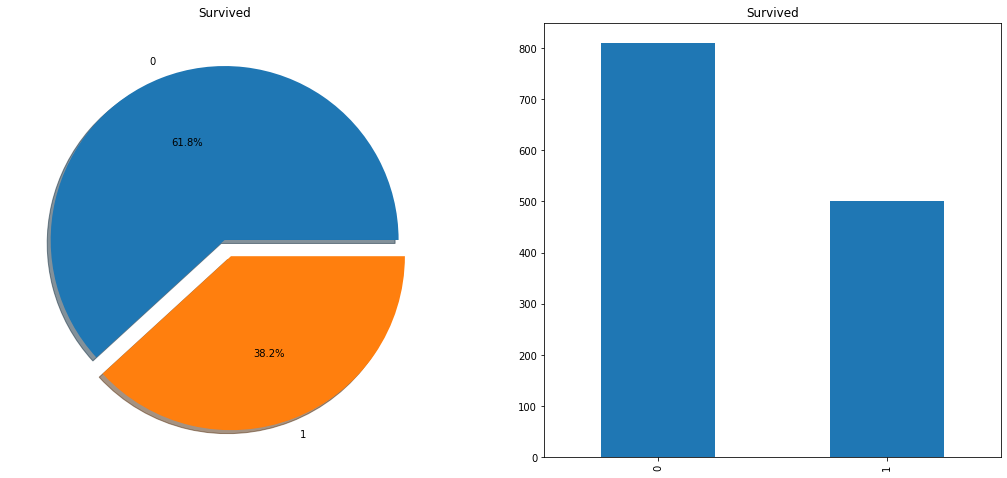

In [93]:
# 생존률 시각화
f,ax=plt.subplots(1,2,figsize=(18,8))
df['survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')

df['survived'].value_counts().plot(kind='bar');
ax[1].set_title('Survived')
plt.show()

---


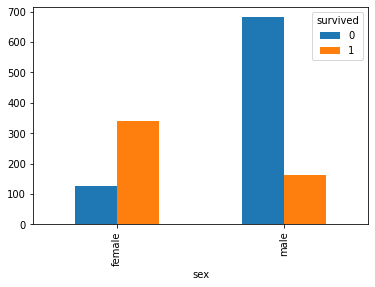

In [108]:
# 성별별 생존률
pd.crosstab(df['sex'], df['survived']).plot.bar();

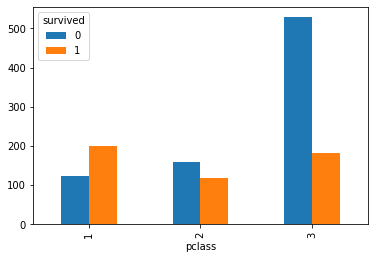

In [103]:
df.groupby(['pclass', 'survived'])['survived'].count().unstack().plot.bar();

## 4. Working with Feature Data
---

## 5. Feature Engineering
---